In [2]:
import numpy as np
from skimage import io
from scipy import ndimage
from skimage import transform

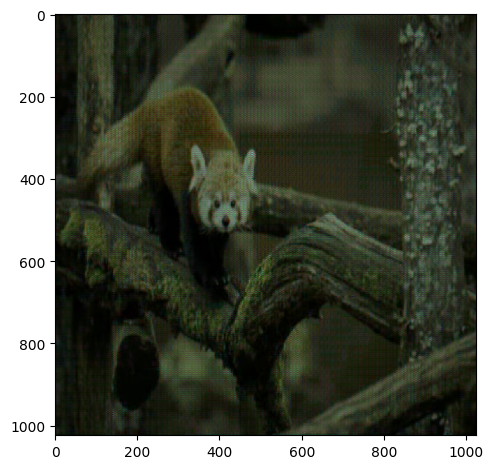

In [6]:
# interpolacja Bayer Mask
def interpolate_red_rows(image):
    rows, cols, _ = image.shape
    for row in range(1, rows, 2):
        image[row, :, 0] = 0.5 * (image[row - 1, :, 0] + image[min(row + 1, rows - 1), :, 0])

def interpolate_red_columns(image):
    rows, cols, _ = image.shape
    for col in range(1, cols, 2):
        image[:, col, 0] = 0.5 * (image[:, col - 1, 0] + image[:, min(col + 1, cols - 1), 0])

def interpolate_green_columns(image):
    rows, cols, _ = image.shape
    for col in range(0, cols, 2):
        image[:, col, 1] = 0.25 * (image[:, max(col - 1, 0), 1] + image[:, min(col + 1, cols - 1), 1] +
                                   image[:, col, 1] + image[:, col, 1])

def interpolate_blue_rows(image):
    rows, cols, _ = image.shape
    for row in range(0, rows, 2):
        image[row, :, 2] = 0.5 * (image[max(row - 1, 0), :, 2] + image[min(row + 1, rows - 1), :, 2])

def interpolate_blue_columns(image):
    rows, cols, _ = image.shape
    for col in range(0, cols, 2):
        image[:, col, 2] = 0.5 * (image[:, col - 1, 2] + image[:, min(col + 1, cols - 1), 2])

def demosaic(image_path):
    mosaic_image = io.imread(image_path) / 255.0  # Normalize pixel values to [0, 1]
    interpolate_red_rows(mosaic_image)
    interpolate_red_columns(mosaic_image)
    interpolate_green_columns(mosaic_image)
    interpolate_blue_rows(mosaic_image)
    interpolate_blue_columns(mosaic_image)

    return (mosaic_image * 255).astype(np.uint8)  # Convert back to 8-bit for display

# Przykładowe użycie
output_image = demosaic('/content/panda.jpg')
output_image = transform.resize(output_image, output_shape=(1024, 1024, 3))
_ = io.imshow(output_image)


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


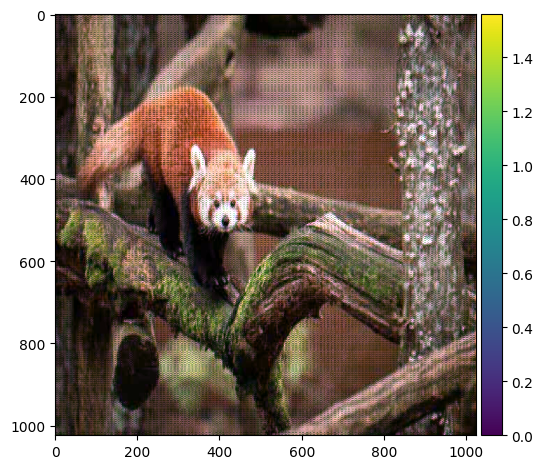

In [4]:
# Bayer Mask
import numpy as np
from skimage import io, transform, color
from scipy import ndimage

image = io.imread('/content/panda.jpg')
image = image[:,:,:3]
image = transform.resize(image, output_shape=(1024, 1024, 3))

# Tworzenie maski konwolucji
demosaicking_convolution_mask = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])

# Przeprowadzenie konwolucji dla każdego kanału
reconstructed_image = np.dstack([
    ndimage.convolve(image[:, :, channel], demosaicking_convolution_mask[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])

# Wyświetlenie zrekonstruowanego obrazu
_ = io.imshow(reconstructed_image)


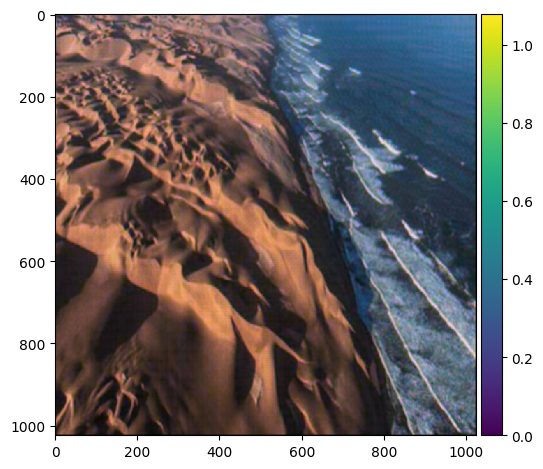

In [7]:
# Fuji mask
def demosaicking_convolution(image, convolution_mask):
    reconstructed_image = np.dstack([
        ndimage.convolve(image[:, :, channel], convolution_mask[:, :, channel], mode="constant", cval=0.0)
        for channel in range(3)
    ])
    return reconstructed_image

# Wczytanie obrazu i zmiana rozmiaru
image = io.imread('/content/namib.jpg')
image = image[:,:,:3]
image = transform.resize(image, output_shape=(1024, 1024, 3))

# Tworzenie maski konwolucji Fuji 6x6
fuji_mask = np.dstack([
     0.1 * np.ones([6, 6]),   # R
     0.05 * np.ones([6, 6]),  # G
     0.1 * np.ones([6, 6]),   # B
])


# Przeprowadzenie konwolucji dla każdego kanału z użyciem maski Fuji
reconstructed_image_fuji = demosaicking_convolution(image, fuji_mask)

# Wyświetlenie zrekonstruowanego obrazu
_ = io.imshow(reconstructed_image_fuji)
